In [43]:
# input the years for which you want to access the data
years = [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999] 
import os
# url for the teams in general 


In [50]:
# for i in range(1):
#     if os.path.exists("Storage/GSW"): 
#         print("hi")
#     else: 
#         os.makedirs("Storage/GSW")

# print(os.path.exists("Pind"))

hi
False


In [54]:
# # gets you the data and stores it in the Storage file 
# # This is so we dont DDoS the website
# import requests

Teams = ["CHI", "GSW"] # A list of the teams
teamnum = 1
url_start = "https://www.basketball-reference.com/teams/" + Teams[teamnum] + "/{}.html"

# for year in years: 
#     url = url_start.format(year)
#     dir =  "Storage/" + Teams[teamnum] +"/{}.html".format(year)
#     if os.path.exists(dir):
#         print("Already loaded the data")
#     else: 
#         if os.path.exists("Storage/" + Teams[teamnum]) == False: 
#             os.makedirs("Storage/" + Teams[teamnum])
#         data = requests.get(url)
#         f = open("Storage/" + Teams[teamnum] + "/{}.html".format(year), "w+", encoding="utf-8")
#         f.write(data.text)
#         print("New File Added")
    
# # Uncomment only when years changes

New File Added
New File Added
New File Added
New File Added
New File Added
New File Added
New File Added
New File Added
New File Added
New File Added


In [55]:
# select dataframe based on the title 
# Adding a year column so we know which year it is 

pergame_table = []
import pandas as pd 
from bs4 import BeautifulSoup

teamnum = 1

for i in years:
    with open("Storage/" + Teams[teamnum] +"/{}.html".format(i), encoding = "utf-8") as f:  
        page = f.read()
        soup = BeautifulSoup(page, "html.parser") # creates a parser class that will help us extract the html code from the page
        pergame = soup.find(id="per_game") # Reads data from the per_game id. 
        pd.read_html(str(pergame))[0]
        df = pd.read_html(str(pergame))[0]
        df.insert(0, "Year", i)
        # append the data frame to a list so that we have a list of dataframes for the pergame data
        pergame_table.append(df)

BigData = pd.concat(pergame_table) # a variable that stores the data for every table. 

print("These are the different stats that we now have access to: \n \n", df.columns) 

These are the different stats that we now have access to: 
 
 Index(['Year', 'Rk', 'Unnamed: 1', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS/G'],
      dtype='object')


In [56]:
# Functino to easily find the relavent stats that are required and return it as a dataframe
# What we ideally need is tha

def FindStats(df): 
    names = df["Unnamed: 1"]
    Steals = df["STL"]
    Assist = df["AST"]
    Blocks = df["BLK"]
    pointsPerGame = df["PTS/G"]
    Rebounds = df["TRB"]
    year = df["Year"]
    dict = {"Year": year, "Names": names, "Steals": Steals , "Assists": Assist, "Points":pointsPerGame,
     "Blocks": Blocks, "Rebounds": Rebounds}
    return pd.DataFrame(dict)

# Lets plot the data where it's easy 

def PlayerData(name, pergame_table): # Takes in the player name and a list of dataframes
   pg = pergame_table[0]
#    pg = pergame_table
   res = pg.loc[pg['Unnamed: 1'] == name] # find the locations where the name is
   for i in range(1, len(pergame_table)):
      pg = pergame_table[i]
      a = pg.loc[pg['Unnamed: 1'] == name] 
      res = pd.concat([res, a])         # return it
   return res # returns the ones with all the values in them 

n = pergame_table[0] # get the first list
NameList = n["Unnamed: 1"] # get the first stats: 

playerlist = []
for i in NameList: 
   playerlist.append(PlayerData(str(i), pergame_table))

In [59]:
A = FindStats(BigData)

Text(0.5, 0.92, 'Clustering for the GSW')

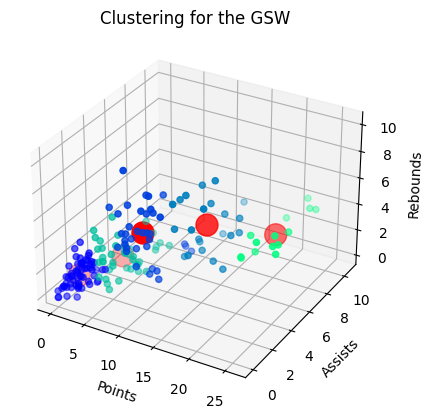

In [61]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy
from sklearn.cluster import KMeans

dict = {"Names:": A["Names"], "Points": A["Points"], "Assists": A["Assists"],  "Rebounds": A["Rebounds"]}

df = pd.DataFrame(dict)

X = list(zip(A["Points"],A["Assists"], A["Rebounds"]))

km = KMeans(5)
clusts = km.fit_predict(X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

km.cluster_centers_ # This gives me the position of the clusters for each part


scatter = ax.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            km.cluster_centers_[:, 2],
            s = 250,
            marker='o',
            c='red',
            label='centroids')
scatter = ax.scatter(df['Points'],df['Assists'], df['Rebounds'],
                     c=clusts,s=20, cmap='winter')

ax.set_xlabel("Points")
ax.set_ylabel("Assists")
ax.set_zlabel("Rebounds")
ax.set_title("Clustering for the GSW")


In [62]:
df["Label"] = clusts


In [70]:
a = df.loc[df['Label'] == 4] 
a

,Names:,Points,Assists,Rebounds,Label
0,Chris Mullin,25.1,4.1,5.9,4
1,Mitch Richmond,22.1,2.9,4.6,4
0,Chris Mullin,25.7,4.0,5.4,4
1,Mitch Richmond,23.9,3.1,5.9,4
2,Tim Hardaway,22.9,9.7,4.0,4
0,Chris Mullin,25.6,3.5,5.6,4
1,Tim Hardaway,23.4,10.0,3.8,4
0,Chris Mullin,25.9,3.6,5.0,4
1,Tim Hardaway,21.5,10.6,4.0,4
0,Latrell Sprewell,21.0,4.7,4.9,4


,Names:,Points,Assists,Rebounds,Label
0,Chris Mullin,25.1,4.1,5.9,4
1,Mitch Richmond,22.1,2.9,4.6,4
0,Chris Mullin,25.7,4.0,5.4,4
1,Mitch Richmond,23.9,3.1,5.9,4
2,Tim Hardaway,22.9,9.7,4.0,4
0,Chris Mullin,25.6,3.5,5.6,4
1,Tim Hardaway,23.4,10.0,3.8,4
0,Chris Mullin,25.9,3.6,5.0,4
1,Tim Hardaway,21.5,10.6,4.0,4
0,Latrell Sprewell,21.0,4.7,4.9,4
